./slurm_scripts/submit.sh  scripts/run_fineweb1B_adam_fista.sh param_configs/attn_fista_rho_mu_sweep.json small_fista  16

In [1]:
from sweep_utils import *

In [2]:
param_configs = "../param_configs/adamw_kq.json"
script_name = "../scripts/run_fineweb1B_adam.sh"
df, missing = load_sweep_jsons(param_configs, script_name)
missing

/mnt/home/tparshakova/Documents/GPT-opt
28 28
[PosixPath('/mnt/home/tparshakova/Documents/GPT-opt/outputs'), PosixPath('/mnt/home/tparshakova/Documents/GPT-opt/logs')]


set()

In [3]:
df[:5]

,path,final_train_loss,min_val_loss,kq_max,kq_median,kq_mean,lr,model,wd
0,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.373496,4.363170,26.75,22.875,22.623992,0.0001,gpt-small-softcap,0.0
1,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.621689,4.611256,50.00,50.000,49.957093,0.005,gpt-small-softcap,0.0
2,/mnt/home/tparshakova/Documents/GPT-opt/output...,3.988099,3.978091,49.00,36.500,36.477358,0.0005,gpt-small-softcap,0.0
3,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.827581,4.818885,26.50,22.375,21.743696,5e-05,gpt-small-softcap,0.0
4,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.921513,4.913958,50.00,50.000,49.970799,0.01,gpt-small-softcap,0.0


(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Minimum Validation Loss'>)

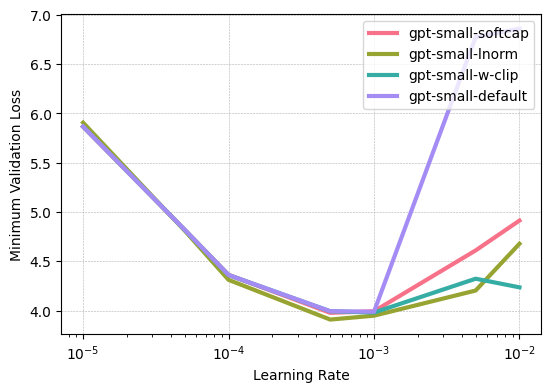

In [4]:
plot_lr_sweep_over_models(df, ycol="min_val_loss")

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Median KQ Value'>)

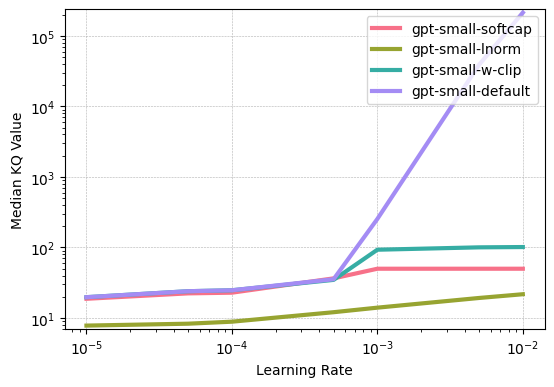

In [5]:
plot_lr_sweep_over_models(df, ycol="kq_median", ylog=True)